# Comparison of phenomenological models

In [1]:
from pylab import *

## Data

In [2]:
data_AUGER = np.genfromtxt("Fitting/Data/AllParticle/AUGER_all_data.txt")
E_AUGER = data_AUGER[:,1]
flux_AUGER = data_AUGER[:,3]
error_AUGER_stat_low = data_AUGER[:,4]; error_AUGER_syst_low = data_AUGER[:,6]
error_AUGER_stat_up = data_AUGER[:,5]; error_AUGER_syst_up = data_AUGER[:,7]
error_AUGER_low = np.sqrt(error_AUGER_stat_low**2 + error_AUGER_syst_low**2)
error_AUGER_up = np.sqrt(error_AUGER_stat_up**2 + error_AUGER_syst_up**2)

In [3]:
data_ICETOP = np.genfromtxt("Fitting/Data/AllParticle/IceTop_all_data.txt")
E_ICETOP = data_ICETOP[:,1]
flux_ICETOP = data_ICETOP[:,3]
error_ICETOP_stat = data_ICETOP[:,4]; error_ICETOP_syst_low = data_ICETOP[:,5]; error_ICETOP_syst_up = data_ICETOP[:,6]
error_ICETOP_low = np.sqrt(error_ICETOP_stat**2 + error_ICETOP_syst_low**2)
error_ICETOP_up = np.sqrt(error_ICETOP_stat**2 + error_ICETOP_syst_up**2)

In [4]:
data_TUNKA = np.genfromtxt("Fitting/Data/AllParticle/TUNKA_all_data.txt")
E_TUNKA = data_TUNKA[:,1]
flux_TUNKA = data_TUNKA[:,3]
error_TUNKA_stat = data_TUNKA[:,4]; error_TUNKA_syst = data_TUNKA[:,5]
error_TUNKA = np.sqrt(error_TUNKA_stat**2 + error_TUNKA_syst**2)

In [5]:
data_HAWC = np.genfromtxt("Fitting/Data/AllParticle/HAWC_all_data.txt")
E_HAWC= data_HAWC[:,1]
flux_HAWC = data_HAWC[:,3]
error_HAWC_stat_low = data_HAWC[:,4]; error_HAWC_syst_low = data_HAWC[:,6]
error_HAWC_stat_up = data_HAWC[:,5]; error_HAWC_syst_up = data_HAWC[:,7]
error_HAWC_low = np.sqrt(error_HAWC_stat_low**2 + error_HAWC_syst_low**2)
error_HAWC_up = np.sqrt(error_HAWC_stat_up**2 + error_HAWC_syst_up**2)

In [6]:
data_KASCADE = np.genfromtxt("Fitting/Data/AllParticle/KASCADE_all_data_QGSJet01.txt")
E_KASCADE = data_KASCADE[:,1]
flux_KASCADE = data_KASCADE[:,3]
error_KASCADE_stat = data_KASCADE[:,4]; error_KASCADE_syst = data_KASCADE[:,5]
error_KASCADE = np.sqrt(error_KASCADE_stat**2 + error_KASCADE_syst**2)

In [7]:
data_NUCLEON = np.genfromtxt("Fitting/Data/AllParticle/NUCLEON_all_data_new.txt")

E_NUCLEON = data_NUCLEON[:,0] / 1e9
flux_NUCLEON = data_NUCLEON[:,1] * 1e9
error_NUCLEON_stat_low = data_NUCLEON[:,2]; error_NUCLEON_stat_up = data_NUCLEON[:,3]
error_NUCLEON_syst_low = data_NUCLEON[:,4]; error_NUCLEON_syst_up = data_NUCLEON[:,5]
error_NUCLEON_low = np.sqrt(error_NUCLEON_stat_low**2 + error_NUCLEON_syst_low**2)
error_NUCLEON_up = np.sqrt(error_NUCLEON_stat_up**2 + error_NUCLEON_syst_up**2)

In [22]:
logE = np.arange(2,9,0.1)
E = 10**logE

## Models

### Prevotat Model

In [23]:
def Intensity(Z, N, E0, E1, gamma):
    E0 = Z * E0
    E1 = Z * E1
    I = (N / E0**2.5) * (E / E0)**(-gamma) * np.exp( - (E0 / E) - (E / E1))
    return I

def I_p(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4):
    I1 = Intensity(1, N1, E01, E11, gamma1)
    I2 = Intensity(1, N2, E02, E12, gamma2)
    I3 = Intensity(1, N3, E03, E13, gamma3)
    I4 = Intensity(1, N4, E04, E14, gamma4)
    I_total = I1 + I2 + I3 + I4
    return I_total

def I_He(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4):
    I1 = Intensity(2, N1, E01, E11, gamma1)
    I2 = Intensity(2, N2, E02, E12, gamma2)
    I3 = Intensity(2, N3, E03, E13, gamma3)
    I4 = Intensity(2, N4, E04, E14, gamma4)
    I_total = I1 + I2 + I3 + I4
    return I_total

def I_CNO(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4):
    I1 = Intensity(7, N1, E01, E11, gamma1)
    I2 = Intensity(7, N2, E02, E12, gamma2)
    I3 = Intensity(7, N3, E03, E13, gamma3)
    I4 = Intensity(7, N4, E04, E14, gamma4)
    I_total = I1 + I2 + I3 + I4
    return I_total

def I_Fe(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4):
    I1 = Intensity(26, N1, E01, E11, gamma1)
    I2 = Intensity(26, N2, E02, E12, gamma2)
    I3 = Intensity(26, N3, E03, E13, gamma3)
    I4 = Intensity(26, N4, E04, E14, gamma4)
    I_total = I1 + I2 + I3 + I4
    return I_total

In [24]:
# DAMPE analysis
N1 = 2.03e4
N2 = 3.67e3
N3 = 1.13e3
N4 = 2.55e3
E01 = 6.21e0
E02 = 2.20e1
E03 = 4.41e3
E04 = 7.90e5
E11 = 4.06e2
E12 = 2.81e4
E13 = 3.08e5
E14 = 1.90e7
gamma1 = 3.25
gamma2 = 2.59
gamma3 = 2.42
gamma4 = 3.02

I_p_DAMPE = I_p(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4)

N1 = 1.06e4
N2 = 2.73e3
N3 = 1.38e3
N4 = 1.73e3

I_He_DAMPE = I_He(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4)

N1 = 7.20e3
N2 = 2.10e3
N3 = 1.23e3
N4 = 7.01e2

I_CNO_DAMPE = I_CNO(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4)

N1 = 2.50e3
N2 = 1.03e3
N3 = 1.00e2
N4 = 3.50e2

I_Fe_DAMPE = I_Fe(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4)

In [25]:
I_all_DAMPE = I_p_DAMPE + I_He_DAMPE + I_CNO_DAMPE + I_Fe_DAMPE

In [26]:
# CALET analysis
N1 = 2.03e4
N2 = 3.67e3
N3 = 4.86e2
N4 = 2.70e3
E01 = 6.21e0
E02 = 2.20e1
E03 = 2.95e3
E04 = 1.20e6
E11 = 4.06e2
E12 = 2.58e4
E13 = 2.67e5
E14 = 2.30e7
gamma1 = 3.25
gamma2 = 2.59
gamma3 = 2.19
gamma4 = 3.19

I_p_CALET = I_p(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4)

N1 = 1.06e4
N2 = 2.73e3
N3 = 9.21e2
N4 = 1.98e3

I_He_CALET = I_He(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4)

N1 = 7.20e3
N2 = 2.10e3
N3 = 4.43e2
N4 = 7.35e2

I_CNO_CALET = I_CNO(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4)

N1 = 2.50e3
N2 = 1.03e3
N3 = 7.00e1
N4 = 3.60e2

I_Fe_CALET = I_Fe(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4)

In [27]:
I_all_CALET = I_p_CALET + I_He_CALET + I_CNO_CALET + I_Fe_CALET 

## Plot

Text(0.5, 1.0, 'All particle spectrum')

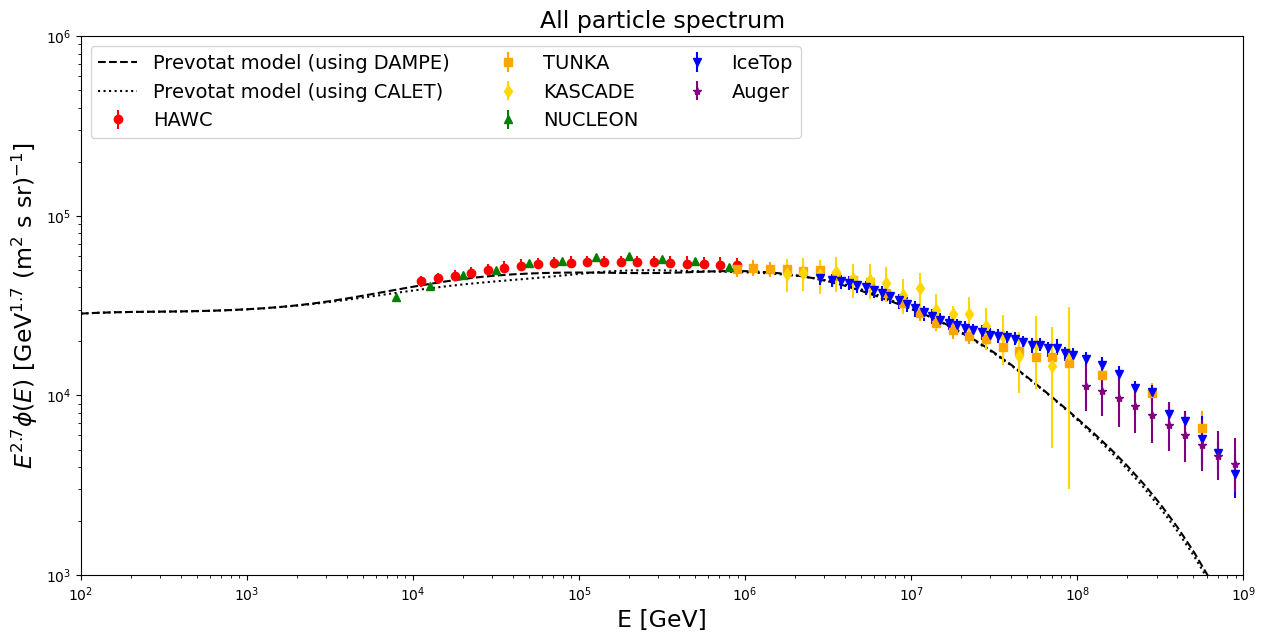

In [30]:
alpha = 2.7 

plt.figure(figsize=(15, 7))
# Models
plt.plot(E, I_all_DAMPE * E**alpha, '--', color='black', label='Prevotat model (using DAMPE)')
plt.plot(E, I_all_CALET * E**alpha, ':', color='black', label='Prevotat model (using CALET)')
# Data
plt.errorbar(E_HAWC, flux_HAWC * E_HAWC**alpha, yerr=(error_HAWC_low, error_HAWC_up) * E_HAWC**2.7, fmt='o', color='red', label='HAWC')
plt.errorbar(E_TUNKA, flux_TUNKA * E_TUNKA**alpha, yerr=error_TUNKA * E_TUNKA**2.7, fmt='s', color='orange', label='TUNKA')
plt.errorbar(E_KASCADE, flux_KASCADE * E_KASCADE**alpha, yerr=error_KASCADE * E_KASCADE**2.7, fmt='d', color='gold', label='KASCADE')
plt.errorbar(E_NUCLEON, flux_NUCLEON * E_NUCLEON**alpha, yerr=(error_NUCLEON_low, error_NUCLEON_up) * E_NUCLEON**2.7, fmt='^', color='green', label='NUCLEON')
plt.errorbar(E_ICETOP, flux_ICETOP * E_ICETOP**alpha, yerr=(error_ICETOP_low, error_ICETOP_up) * E_ICETOP**2.7, fmt='v', color='blue', label='IceTop')
plt.errorbar(E_AUGER, flux_AUGER * E_AUGER**alpha, yerr=(error_AUGER_low, error_AUGER_up) * E_AUGER**2.7, fmt='*', color='purple', label='Auger')
plt.loglog()
plt.xlim(1e2, 1e9)
plt.ylim(1e3, 1e6)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('All particle spectrum'3, fontsize=17)